<h1>KNN Classifier</h1>

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [13]:
iris = load_iris()
class_names = iris.target_names

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [15]:
knn = KNeighborsClassifier()

In [5]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
y_pred = knn.predict(X_test)

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


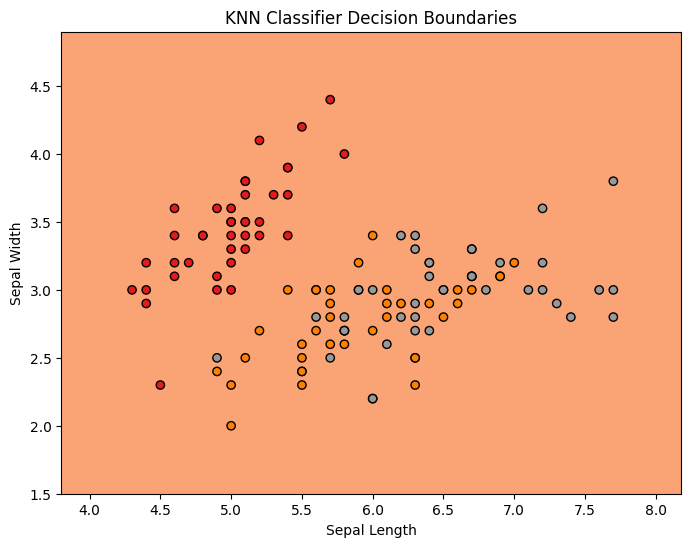

In [9]:
def plot_decision_boundaries(X, y, classifier):
    h = 0.02  # Step size for the mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('KNN Classifier Decision Boundaries')
    plt.show()

# Plot the decision boundaries
plot_decision_boundaries(X_train[:, :2], y_train, knn)

<h2>Hyper-parameters</h2>

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
param_grid = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'weights': ['uniform', 'distance'],
    'p': [1,2],
    'algorithm': ['auto']
}

In [16]:
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [17]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [18]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [20]:
print("Best parameters:", grid_search.best_params_)

print("Best score:", grid_search.best_score_)

print("Best estimator:", grid_search.best_estimator_)

results = grid_search.cv_results_
print("All results:")

for mean_score, params in zip(results['mean_test_score'], results['params']):
    print("Mean score:", mean_score, "Parameters:", params)

Best parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best score: 0.9583333333333334
Best estimator: KNeighborsClassifier(n_neighbors=3, p=1)
All results:
Mean score: 0.95 Parameters: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Mean score: 0.95 Parameters: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
Mean score: 0.95 Parameters: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Mean score: 0.95 Parameters: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
Mean score: 0.925 Parameters: {'algorithm': 'auto', 'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
Mean score: 0.95 Parameters: {'algorithm': 'auto', 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
Mean score: 0.95 Parameters: {'algorithm': 'auto', 'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
Mean score: 0.95 Parameters: {'algorithm': 'auto', 'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
Mean score: 0.9

In [22]:
b_params = grid_search.best_params_
model = KNeighborsClassifier(**b_params)